In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from skimage import io
from ipywidgets import interact

(200, 400, 400)


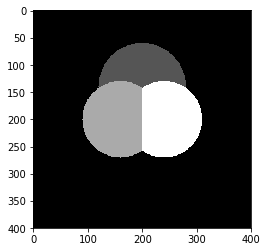

In [2]:
im = io.imread('../../../ForceInferenceProject/Data/Generated/three_intersecting_spheres_aniso.tif')
print(im.shape)
plt.figure()
plt.imshow(im[100],cmap='gray')
plt.show()

In [3]:
def aroundArray(image,zIndex,yIndex,xIndex):
    tempList = []
    for w in range(zIndex-1,zIndex+2):
        for q in range(yIndex-1,yIndex+2):
            for v in range(xIndex-1,xIndex+2):
                tempList.append(image[w][q][v])
    return tempList

def findTE(image,zIndex,pointArray):
    tepoints = []
    #zList = np.where(pointArray == zIndex)
    planePoints = []
    for x,y,z in pointArray:
        if z == zIndex:
            planePoints.append([x,y,zIndex])
    for point in planePoints:
        x,y = point[0], point[1]
        tempList = aroundArray(image,zIndex,y,x)
        if(len(set(tempList))>=3):
            listy = [x,y,zIndex]
            tepoints.append(listy)
    return tepoints

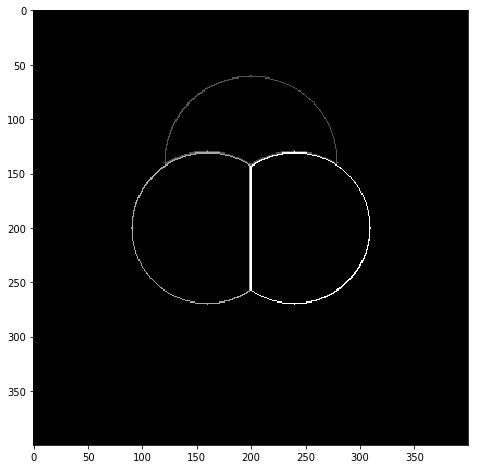

In [4]:
### Identify outlines by comparing shifted images

# Pad the image by 1 voxel on all sides
im_pad = np.pad(im, 1, mode='reflect')

# Get possible shifts in all directions
shifts = itertools.product([0,1], repeat=3)

# Check and accumulate differences in shifts
outlines = np.zeros_like(im, dtype=np.bool)
for shift in shifts:
    zs0, ys0, xs0 = [slice(1, None) if s else slice(None) for s in shift]
    zs1, ys1, xs1 = [slice(None,-1) if s else slice(None) for s in shift]
    comparison = im_pad[zs0, ys0, xs0] != im_pad[zs1, ys1, xs1]
    outlines  += comparison[:im.shape[0],  :im.shape[1],  :im.shape[2]]
    outlines  += comparison[-im.shape[0]:, -im.shape[1]:, -im.shape[2]:]  # Symmetry
    
# Re-annotate the cell identities
outlines_id = outlines * im

# print image
plt.figure(figsize=(8,8))
plt.imshow(outlines_id[100], cmap='gray')
plt.show()

#outline cordinates
sepOutlinePoints = np.where(outlines == True)  
outlinePoints = list(zip(sepOutlinePoints[2],sepOutlinePoints[1],sepOutlinePoints[0]))

In [5]:

TES = []
for plane in range(len(im)):
    TES += findTE(im,plane,outlinePoints)


In [6]:
TES_z = []
for TE in TES:
    if TE[2] == 100:
        TES_z.append(TE)
print(TES_z)

[[120, 141, 100], [121, 141, 100], [200, 141, 100], [279, 141, 100], [280, 141, 100], [120, 142, 100], [121, 142, 100], [199, 142, 100], [200, 142, 100], [279, 142, 100], [280, 142, 100], [199, 143, 100], [200, 143, 100], [199, 257, 100], [200, 257, 100], [199, 258, 100], [200, 258, 100], [200, 259, 100]]


In [7]:
@interact(z=(0, im.shape[0]-1, 1))
def show_stack(z=im.shape[0]//2):
    
    plt.figure(figsize=(8,8))
    plt.imshow(outlines_id[z], cmap='gray')
    
    TES_z_x = []
    TES_z_y = []
    for TE in TES:
        if TE[2] == z:
            TES_z_x.append(TE[0])
            TES_z_y.append(TE[1])
    
    plt.scatter(TES_z_x, TES_z_y, c='r', alpha=0.5, s=5)
    
    plt.show()

interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

In [8]:
from mpl_toolkits.mplot3d import Axes3D

In [9]:
x = [TE[0] for TE in TES]
y = [TE[1] for TE in TES]
z = [TE[2] for TE in TES]

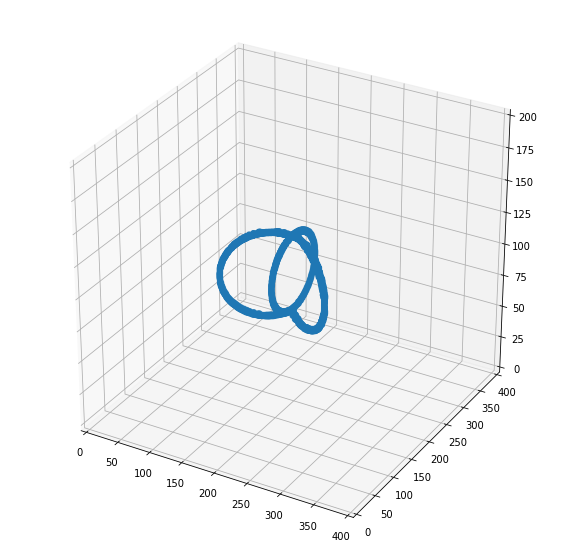

In [10]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)

ax.set_xlim([0,400])
ax.set_ylim([0,400])
ax.set_zlim([0,200])
plt.show()